# Creación de funciones

## Questions

- ¿Cómo puedo definir nuevas funciones?

- ¿Cuál es la diferencia entre definir y llamar a una función?

- ¿Qué sucede cuando llamo a una función?

## Objetivos

- Definir una función que toma parámetros.

- Devuelve un valor de una función.

- Establecer valores por defecto para los parámetros de la función.

- Documentar nuestras funciones.

- Explicar por qué debemos dividir los programas en funciones pequeñas de un solo propósito.

En este punto, hemos escrito código para dibujar algunas características interesantes en nuestros datos, bucle sobre todos nuestros archivos de datos para dibujar rápidamente estas gráficas para cada uno de ellos, y tener Python tomar decisiones basadas en lo que ve en nuestros datos. Pero, nuestro código se está volviendo bastante largo y complicado; ¿y si tuviéramos miles de conjuntos de datos y no quisiéramos generar una cifra para cada uno? Comentar el código de dibujo es una molestia. Además, ¿qué pasa si queremos usar ese código de nuevo, en un conjunto de datos diferente o en un punto diferente de nuestro programa? Cortarlo y pegarlo hará que nuestro código sea muy largo y muy repetitivo, muy rápido. Nos gustaría una forma de empaquetar nuestro código para que sea más fácil de reutilizar, y Python proporciona esto al permitirnos definir cosas llamadas 'funciones' - una forma abreviada de volver a ejecutar piezas de código más largas. Comencemos definiendo una función `fahr_to_celsius` que convierte las temperaturas de Fahrenheit a Celsius:

In [5]:
def fahr_to_celsius(temp):
    return ((temp - 32) * (5/9))


0.0

![python function](media/python-function.svg)

La definición de la función se abre con la palabra clave `def` seguida del nombre de la función (`fahr_to_celsius`) y una lista entre paréntesis de los nombres de los parámetros (`temp`). El cuerpo de la función - las instrucciones que se ejecutan cuando se ejecuta - tiene sangría debajo de la línea de definición. El cuerpo concluye con una palabra clave `return` seguida del valor devuelto.

Cuando llamamos a la función, los valores que le pasamos se asignan a esas variables para que podamos usarlas dentro de la función. Dentro de la función, usamos una declaración de retorno para enviar un resultado a quien lo haya pedido.

Probemos con nuestra función.


In [7]:
# This command should call our function, using “32” as the input and return the function value.
fahr_to_celsius(32)

0.0

De hecho, llamar a nuestra propia función no es diferente de llamar a cualquier otra función:

In [8]:
print('freezing point of water:', fahr_to_celsius(32), '°C')
print('boiling point of water:', fahr_to_celsius(212), '°C')

freezing point of water: 0.0 °C
boiling point of water: 100.0 °C


Hemos llamado con éxito a la función que definimos, y tenemos acceso al valor que devolvimos.

Funciones de composición

Ahora que hemos visto cómo convertir Fahrenheit en Celsius, también podemos escribir la función para convertir Celsius en Kelvin:

In [9]:
def celsius_to_kelvin(temp_c):
    return temp_c + 273.15

print('freezing point of water in Kelvin:', celsius_to_kelvin(0.))

freezing point of water in Kelvin: 273.15


¿Qué hay de convertir Fahrenheit a Kelvin? Podríamos escribir la fórmula, pero no es necesario. En su lugar, podemos componer las dos funciones que ya hemos creado:

In [10]:
def fahr_to_kelvin(temp_f):
    temp_c = fahr_to_celsius(temp_f)
    temp_k = celsius_to_kelvin(temp_c)
    return temp_k

print('boiling point of water in Kelvin:', fahr_to_kelvin(212.0))

boiling point of water in Kelvin: 373.15


Esta es nuestra primera muestra de cómo se construyen los programas más grandes: definimos las operaciones básicas, luego las combinamos en trozos cada vez más grandes para obtener el efecto que queremos. Las funciones de la vida real generalmente serán más grandes que las que se muestran aquí - típicamente de media docena a unas pocas docenas de líneas - pero nunca deberían ser mucho más largas que eso, o la siguiente persona que lo lea no podrá entender lo que está pasando.

# Puesta en orden

Ahora que sabemos cómo envolver bits de código en funciones, podemos hacer que nuestro análisis de luminancia sea más fácil de leer y más fácil de reutilizar. Primero, hagamos una función de visualización que genere nuestras gráficas y una función de búsqueda de secciones.


In [12]:
import numpy as np
import matplotlib.pyplot as plt


def find_data_cross_section(simulation_filename):
    simulation = np.loadtxt(fname=simulation_filename, skiprows=52)
    assert len(simulation) > 0

    x_simulation = simulation[:, 0]
    y_simulation = simulation[:, 1]
    L_simulation = simulation[:, 2]
    smallest_y = np.amin(abs(y_simulation))
    x_cross_section = x_simulation[y_simulation==smallest_y]
    luminance_cross_section = L_simulation[y_simulation==smallest_y]

    return x_cross_section, luminance_cross_section


def visualize(experiment_filename, simulation_filename):

    experiment = np.loadtxt(fname=experiment_filename, delimiter=',')
    x, luminance = find_data_cross_section(simulation_filename)


    fig = plt.figure()
    # just a single plot needed here
    ax = fig.add_subplot(111)
    ax.plot(x, luminance, label='data/simulation')
    ax.plot(experiment[:,0], experiment[:, 1], marker='+', linestyle=' ', label='experiment')
    
    # set the labels
    ax.set_xlabel('x position [mm]')
    ax.set_ylabel('Luminance [Cd/m^2]')
    ax.set_title(filename)
    ax.legend()
    
    # plt.show() always makes the plot appear that has been drawn. 
    # It is redundant in jupyter notebooks but necessary in scripts!
    plt.show()

y otra función llamada `calculate_average_luminance` que encuentra la luminancia media sobre los led:

In [13]:
def calculate_average_luminance(x, luminance):
    boolean_array = np.logical_and(x<=10., x>= -10.)
    average_luminance = np.mean(luminance[boolean_array])
    return average_luminance

¡Espera! ¿No nos olvidamos de especificar qué función de visualización debería devolver? Bueno, no lo hicimos. En Python, las funciones no son necesarias para incluir una sentencia `return` y pueden usarse con el único propósito de agrupar piezas de código que conceptualmente hacen una cosa. En tales casos, los nombres de función generalmente describen lo que hacen, p. ej.

Observe que en lugar de mezclar este código en un bucle gigante `para` , ahora podemos leer y reutilizar ambas ideas por separado. Podemos reproducir el análisis anterior con un bucle `para` mucho más simple:

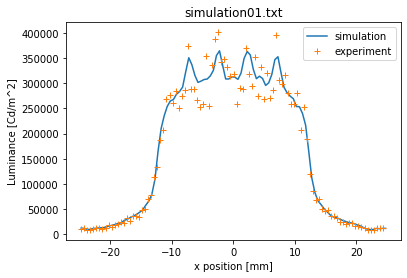

Experiment & Simulation difference = 3.319310065215488 %


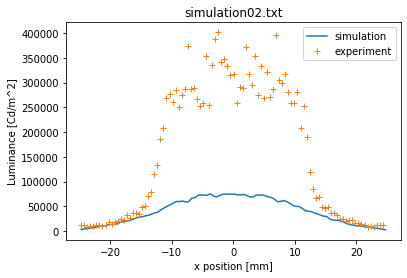

Experiment & Simulation difference = 77.88975272561785 %


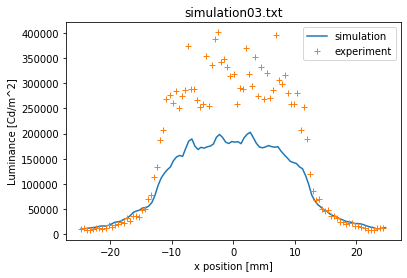

Experiment & Simulation difference = 42.73462211252939 %


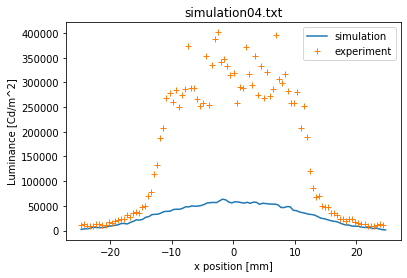

Experiment & Simulation difference = 82.72425871918331 %


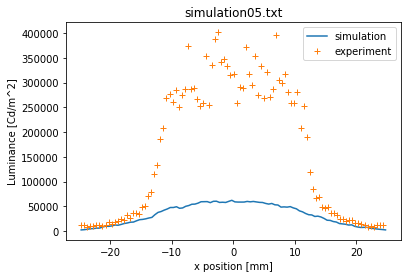

Experiment & Simulation difference = 81.94342576807645 %


In [3]:
import glob 


filenames = sorted(glob.glob('simulation*.txt'))  # sorted is another built-in function that sorts our list of files

for filename in filenames:
    visualize('experiment01.csv', filename)
    
    x, luminance = find_data_cross_section(filename)
    simulation_average = calculate_average_luminance(x, luminance)
    
    experiment = np.loadtxt(fname='experiment01.csv', delimiter=',')
    experiment_average = calculate_average_luminance(experiment[:,0], experiment[:,1])
    
    percentage_difference = abs(simulation_average - experiment_average)*100./experiment_average
    
    # str() can be used as a function to convert python objects into strings
    print('Experiment & Simulation difference = ' + str(percentage_difference) + ' %')

Al dar a nuestras funciones nombres legibles por humanos, podemos leer y entender más fácilmente lo que está sucediendo en el bucle for. Aún mejor, si en una fecha posterior queremos volver a usar cualquiera de esas piezas de código, podemos hacerlo en una sola línea.

> # Aparte: Pruebas 
>
> Una vez que empezamos a poner las cosas en funciones para que podamos reutilizarlas, tenemos que empezar a probar que esas funciones funcionan correctamente. Para ver cómo hacer esto, vamos a probar nuestra función de cálculo promedio, reproducida a continuación para mayor facilidad. Cubrimos las pruebas con más detalle en la próxima lección, pero aquí incluimos esto aparte sobre cómo probar de manera efectiva.

In [14]:
def calculate_average_luminance(x, luminance):
    boolean_array = np.logical_and(x<=10., x>= -10.)
    average_luminance = np.mean(luminance[boolean_array])
    return average_luminance

> Podríamos probar esto en nuestros datos reales, pero como no sabemos cuáles deben ser los valores, será difícil saber si el resultado fue correcto. En su lugar, vamos a usar NumPy para crear algunos casos que *conocemos* para ser correctos y asegurarnos de que devuelve la respuesta correcta!
> 
> ## Primera Prueba
> 
> Al probar es importante desafiar constantemente cualquier suposición que pueda tener. Descubre errores porque *pensamos* que el sistema *obviamente* se comportaría de cierta manera, y luego encontramos que en realidad no lo hace.
>
> Así que aquí debemos probar algo obvio. Si proporcionamos luminancia de solo ceros, entonces nuestro promedio debe ser cero. Vamos a comprobar!

In [15]:
x = np.arange(-20, 20, 1)
luminance = np.zeros((40))

result = calculate_average_luminance(x, luminance)
assert result == 0., "this is the error"

> Eso parece correcto! Ahora vamos a probar algo un poco más complejo.
>
> ## Segunda prueba
>
> Debemos probar que si proporcionamos valores distintos de cero para la luminancia en la región, ¡estamos comprobando que recuperamos ese valor distinto de cero!

In [16]:
x = np.arange(-20, 20, 1)
luminance = np.zeros((40))
luminance[np.logical_and(x<=10., x>=-10.)] += 1.

result = calculate_average_luminance(x, luminance)
assert result == 1.

> Hasta ahora todo bien. Pero hasta ahora, hemos estado comprobando lo que se conoce comúnmente como casos "felices". Hemos estado probando cómo se comporta la función cuando recibe lo que se supone que debe y que se comporta correctamente. Pero hay otro tipo de caso que es igual de importante (si no más) el caso "Infeliz". En el caso infeliz alimentamos la función deliberadamente entradas incorrectas para comprobar que las maneja como esperamos.
>
> ## Tercera prueba - Caso infeliz
>
> Es difícil probar casos infelices sin usar una biblioteca de pruebas especializada porque arroja tantos errores. Pero, aquí vamos a escribir algún código erróneo y comprobar que el error que obtenemos es lo que esperábamos ver.
>
> Ej. vamos a alimentar en dos listas, en lugar de matrices numpy. Esperaríamos obtener un `TypeError` ya que el tipo del objeto que hemos suministrado es incorrecto. 

In [17]:
x = list(np.arange(-20, 20, 1))
luminance = list(np.zeros((40)))
print(type(x), type(luminance))

result = calculate_average_luminance(x, luminance)

<class 'list'> <class 'list'>


TypeError: '<=' not supported between instances of 'list' and 'float'

> ¡Eso es lo que encontramos! Volveremos a discutir las pruebas un poco más en una lección posterior.
>
> > **Nota:** Hay varias formas de formalizar las pruebas de código que ha escrito. La más fácil de aprender es la biblioteca de python *pytest*. Los entresijos de este paquete están cubiertos en el curso de prueba avanzada; por ahora, es suficiente saber que tales cosas existen y que probar tu código usando más código es una buena idea!

# Documentación

Pero primero tenemos una tarea más. Deberíamos escribir algo de documentación para nuestra función para recordarnos más tarde para qué sirve y cómo usarla. Hay dos formas comunes de poner documentación en el software. La primera es agregar comentarios como este:

In [18]:
# This function takes two numpy arrays and calculates the average value of the second over the region -10 to 10, 
# which is defined in the first array.
def calculate_average_luminance(x, luminance):
    boolean_array = np.logical_and(x<=10., x>= -10.)
    average_luminance = np.mean(luminance[boolean_array])
    return average_luminance

There’s a better way, though. If the first thing in a function is a string that is not assigned to a variable, that string is attached to the function as its documentation:

In [19]:
def calculate_average_luminance(x, luminance):
    """This function takes two numpy arrays and calculates the average value of the second over the region -10 to 10, 
    which is defined in the first array."""
    boolean_array = np.logical_and(x<=10., x>= -10.)
    average_luminance = np.mean(luminance[boolean_array])
    return average_luminance

Esto es mejor porque ahora podemos pedir al sistema de ayuda incorporado de Python que nos muestre la documentación para la función:

In [20]:
help(calculate_average_luminance)

Help on function calculate_average_luminance in module __main__:

calculate_average_luminance(x, luminance)
    This function takes two numpy arrays and calculates the average value of the second over the region -10 to 10, 
    which is defined in the first array.



Una cadena como esta se llama docstring. No necesitamos usar comillas triples cuando escribimos una, pero si lo hacemos, podemos romper la cadena a través de varias líneas:

In [21]:
def calculate_average_luminance(x, luminance):
    """This function takes two numpy arrays and calculates the average value of the second over the region -10 to 10, 
    which is defined in the first array.

    Examples
    --------
    >>> x = np.array([-20, -10, 0, 10, 20])
    >>> L = np.array([0, 2, 5, 2, 0])
    >>> calculate_average_luminance(x, L)
    3.0
    """
    boolean_array = np.logical_and(x<=10., x>= -10.)
    average_luminance = np.mean(luminance[boolean_array])
    return average_luminance

help(calculate_average_luminance)

Help on function calculate_average_luminance in module __main__:

calculate_average_luminance(x, luminance)
    This function takes two numpy arrays and calculates the average value of the second over the region -10 to 10, 
    which is defined in the first array.
    
    Examples
    --------
    >>> x = np.array([-20, -10, 0, 10, 20])
    >>> L = np.array([0, 2, 5, 2, 0])
    >>> calculate_average_luminance(x, L)
    3.0



> **Nota:** Las cadenas de texto de comillas triples son cadenas *en realidad* y pueden usarse como tales. No es común verlos en programas python, pero si tiene una cadena larga, multi-línea, hardcoded, es común ponerla entre comillas triples. Por ejemplo:
> Python
> my_long_string = """Todo está mal
> Por derecho ni siquiera deberíamos estar aquí.
> Pero nosotros sí.
> Es como en las grandes historias Sr. Frodo.
> Los que realmente importaban.
> Llenos de oscuridad y peligro,
> y a veces no querías saber el final.
> Porque ¿cómo podría el final ser feliz.
> ¿Cómo podría el mundo volver a la forma en que era cuando tanto mal sucedió.
> Pero al final, es solo una cosa pasajera, esta sombra.
> Incluso la oscuridad debe pasar.
> Llegará un nuevo día.
> Y cuando el sol brille brillará más claro.
> Esas fueron las historias que se quedaron contigo.
> Eso significaba algo.
> Incluso si fueras demasiado pequeño para entender por qué.
> Pero creo, Sr. Frodo, que lo entiendo.
> Ahora lo sé.
> La gente en esas historias tenía muchas posibilidades de regresar solo que no lo hicieron.
> Porque se aferraban a algo.""
> El tiempo de trabajo
>
> Además, se pueden usar comillas triples con el carácter de comillas simples `'` pero son muy inusuales y no se recomiendan.

# Definición de valores predeterminados

Mencionamos esto en una lección anterior, pero aquí lo analizaremos con más detalle. Hemos pasado argumentos a funciones de dos maneras: directamente, como en `type(data)`, y por nombre, como en `np.loadtxt(fname='something.csv', delimiter=',')`. De hecho, podemos pasar el nombre del archivo a `loadtxt` sin el `fname=`:

In [22]:
np.loadtxt('data/experiment01.csv', delimiter=',')

array([[-2.47500000e+01,  1.12887334e+04],
       [-2.42545045e+01,  1.28439692e+04],
       [-2.37590090e+01,  8.73308216e+03],
       [-2.32635135e+01,  9.28428213e+03],
       [-2.27680180e+01,  9.71998320e+03],
       [-2.22725225e+01,  1.26691621e+04],
       [-2.17770270e+01,  1.25625658e+04],
       [-2.12815315e+01,  1.09744085e+04],
       [-2.07860360e+01,  1.19814618e+04],
       [-2.02905405e+01,  1.80491245e+04],
       [-1.97950450e+01,  1.44574182e+04],
       [-1.92995495e+01,  1.89761845e+04],
       [-1.88040541e+01,  2.08202613e+04],
       [-1.83085586e+01,  2.33232490e+04],
       [-1.78130631e+01,  2.31820626e+04],
       [-1.73175676e+01,  3.19741050e+04],
       [-1.68220721e+01,  2.64591704e+04],
       [-1.63265766e+01,  3.60125238e+04],
       [-1.58310811e+01,  3.65891726e+04],
       [-1.53355856e+01,  3.50759625e+04],
       [-1.48400901e+01,  4.77579559e+04],
       [-1.43445946e+01,  5.04921924e+04],
       [-1.38490991e+01,  6.99626661e+04],
       [-1.

but we still need to say `delimiter=`:

```Python
np.loadtxt('experiment01.csv', ',')
```

will throw an error.

```
Traceback (most recent call last):

  File "c:\users\jderrick\appdata\local\programs\python\python38\lib\site-packages\IPython\core\interactiveshell.py", line 3418, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)

  File "<ipython-input-22-1d44534e11cb>", line 2, in <module>
    np.loadtxt('experiment01.csv', ',')

  File "c:\users\jderrick\appdata\local\programs\python\python38\lib\site-packages\numpy\lib\npyio.py", line 1055, in loadtxt
    dtype = np.dtype(dtype)

  File "c:\users\jderrick\appdata\local\programs\python\python38\lib\site-packages\numpy\core\_internal.py", line 199, in _commastring
    newitem = (dtype, ast.literal_eval(repeats))

  File "c:\users\jderrick\appdata\local\programs\python\python38\lib\ast.py", line 59, in literal_eval
    node_or_string = parse(node_or_string, mode='eval')

  File "c:\users\jderrick\appdata\local\programs\python\python38\lib\ast.py", line 47, in parse
    return compile(source, filename, mode, flags,

  File "<unknown>", line 1
    ,
    ^
SyntaxError: unexpected EOF while parsing

```

Para entender lo que está pasando, definamos una función simple.

In [23]:
def print_name_and_job(name, job):
    print('my name is ' + name)
    print('my job is '+ job)

If we call it as it is.

In [24]:
print_name_and_job('Samwise', 'Gardener')

my name is Samwise
my job is Gardener


Funciona bien, pero digamos que solo estamos usando esto en el contexto de la beca y realmente el título del trabajo es más probable que sea "miembro de la beca". Si no se proporciona nada, queremos hacerlo por defecto.

El cambio clave es que el segundo parámetro ahora se escribe `job='fellowship'` en lugar de `job`. Si llamamos a la función con dos argumentos, funciona como antes:

In [25]:
def print_name_and_job(name, job='fellowship member'):
    print('my name is ' + name)
    print('my job is '+ job)

In [26]:
print_name_and_job('Frodo', 'ring-bearer')

my name is Frodo
my job is ring-bearer


Pero ahora también podemos llamarlo con un solo argumento, en cuyo caso `job` se le asigna automáticamente el valor predeterminado de `fellowship member`:

In [27]:
print_name_and_job('Boromir')

my name is Boromir
my job is fellowship member


Esto es útil: si normalmente queremos que una función funcione de una manera, pero ocasionalmente la necesitamos para hacer algo más, podemos permitir que las personas pasen un argumento cuando lo necesiten pero proporcionen un valor predeterminado para facilitar el caso normal. El siguiente ejemplo muestra cómo Python compara valores con argumentos:

In [28]:
def display(a=1, b=2, c=3):
    print('a:', a, 'b:', b, 'c:', c)

print('no arguments:')
display()
print('one arguments:')
display(55)
print('two arguments:')
display(55, 66)

no arguments:
a: 1 b: 2 c: 3
one arguments:
a: 55 b: 2 c: 3
two arguments:
a: 55 b: 66 c: 3


Como muestra este ejemplo, los argumentos se comparan de izquierda a derecha, y cualquiera al que no se le ha dado un valor obtiene explícitamente su valor predeterminado. Podemos anular este comportamiento nombrando el valor a medida que lo pasamos:

In [ ]:
print('only setting the value of c')
display(c=77)

Con eso en la mano, veamos la ayuda para `numpy.loadtxt`:

In [2]:
import numpy as np


help(np.loadtxt)

Help on function loadtxt in module numpy:

loadtxt(fname, dtype=<class 'float'>, comments='#', delimiter=None, converters=None, skiprows=0, usecols=None, unpack=False, ndmin=0, encoding='bytes', max_rows=None, *, like=None)
    Load data from a text file.
    
    Each row in the text file must have the same number of values.
    
    Parameters
    ----------
    fname : file, str, or pathlib.Path
        File, filename, or generator to read.  If the filename extension is
        ``.gz`` or ``.bz2``, the file is first decompressed. Note that
        generators should return byte strings.
    dtype : data-type, optional
        Data-type of the resulting array; default: float.  If this is a
        structured data-type, the resulting array will be 1-dimensional, and
        each row will be interpreted as an element of the array.  In this
        case, the number of columns used must match the number of fields in
        the data-type.
    comments : str or sequence of str, optional
  

Hay mucha información aquí, pero la parte más importante es el primer par de líneas:
```
loadtxt(fname, dtype=<class 'float'>, comments='#', delimiter=None, converters=None, skiprows=0, usecols=None, unpack=False, ndmin=0, encoding='bytes', max_rows=None)
```

(si ves algo un poco diferente, puedes tener una versión diferente de numpy que la que este curso fue creado usando: 1.19.4)

Esto nos dice que `loadtxt` tiene un parámetro llamado `fname` que no tiene un valor predeterminado, y otros och

```Python
np.loadtxt('experiment01.csv', ',')
```

entonces el nombre del archivo se asigna a `fname` (que es lo que queremos), pero la cadena delimitadora `','` se asigna a `dtype` en lugar de `delimiter`, porque `dtype` es el segundo parámetro de la lista. Sin embargo `','` no es un `dtype` conocido, así que nuestro código producirá un mensaje de error cuando intentemos ejecutarlo. Cuando llamamos a `loadtxt` no tenemos que proporcionar `fname=` para el nombre del archivo porque es el primer elemento de la lista, pero si queremos que el `','` sea asignado a la variable `delimiter`, tenemos que proporcionar `delimitador=` para el segundo parámetro ya que `delimitador` no es el segundo parámetro de la lista.

> **Nota sobre "argumento" vs "parámetro":** Los términos "argumento" y "parámetro" tienen diferencias específicas, aunque a menudo es difícil discernir cuáles son. La mejor distinción que conozco es la siguiente: "Técnicamente, los parámetros son variables en una definición de función y los argumentos son los valores reales dados a las variables en el punto de llamada. Por ejemplo: 
> ```Python
> def foo(arg): 
>     return arg 
> foo('Python') 
> ```
> La variable arg en la definición de función es el parámetro y el valor Python en la llamada a función es un argumento para ese parámetro." (de la respuesta proporcionada) [here](https://cmsdk.com/python/what-is-the-difference-between-argument-and-parameter-in-python.html#:~:text=Technically%2C%20parameters%20are%20variables%20in%20a%20function%20definition,function%20call%20is%20an%20argument%20to%20that%20parameter)). Confusion often arises, sin embargo, debido a que los parámetros a menudo se llaman "`arg`" (como en el ejemplo) porque se utilizan para almacenar los argumentos cuando se llama a la función! En nuestra discusión anterior, `delimitador` es el parámetro y `,` es el argumento.
> 
> La distinción no es importante en el nivel de principiante, pero el uso de ambas palabras es extremadamente común y debe tenerse en cuenta!

Funciones de lectura

Considere estas dos funciones:

```Python
def s(p):
    a = 0
    for v in p:
        a += v
    m = a / len(p)
    d = 0
    for v in p:
        d += (v - m) * (v - m)
    return numpy.sqrt(d / (len(p) - 1))

def std_dev(sample):
    sample_sum = 0
    for value in sample:
        sample_sum += value

    sample_mean = sample_sum / len(sample)

    sum_squared_devs = 0
    for value in sample:
        sum_squared_devs += (value - sample_mean) * (value - sample_mean)

    return numpy.sqrt(sum_squared_devs / (len(sample) - 1))
```

Las funciones `s` y `std_dev` son computacionalmente equivalentes (ambas calculan la desviación estándar de la muestra), pero para un lector humano, se ven muy diferentes. Usted probablemente encontró `std_dev` mucho más fácil de leer y entender que `s`.

Como ilustra este ejemplo, tanto la documentación como el estilo de codificación de un programador se combinan para determinar lo fácil que es para otros leer y entender el código del programador. Elegir nombres de variables significativos y usar espacios en blanco para dividir el código en "trozos" lógicos son técnicas útiles para producir código legible. Esto es útil no solo para compartir código con otros, sino también para el programador original. Si necesitas revisar el código que escribiste hace meses y no has pensado desde entonces, ¡apreciarás el valor del código legible!

# Ejercicio 1 - Combinar cadenas

"Agregar" dos cadenas produce su concatenación: `'a' + 'b'` es `'ab'`. Escribe una función llamada `fence` que toma dos parámetros llamados `original` y `wrapper` y devuelve una nueva cadena que tiene el carácter `wrapper` al principio y al final del original. Una llamada a su función debería verse así:
```Python
print(fence('name', '*'))
> *name*
```

In [29]:
# Enter your solution here
def fence(original, wrapper):
    return wrapper + original + wrapper

fence('name', '*')

'*name*'

# Ejercicio 2* `retorno` vs `impresión()`

Tenga en cuenta que `return` y `print` no son intercambiables. `print` es una función de Python que imprime datos en la pantalla. Nos permite a los usuarios ver los datos. La declaración `return` , por otro lado, hace que los datos sean visibles para el programa. Echemos un vistazo a la siguiente función:

```Python
def add(a, b):
    print(a + b)
```

Pregunta: ¿Qué veremos si ejecutamos los siguientes comandos?

```Python
A = add(7, 3)
print(A)
```

In [ ]:
## Ejercicio 07.2

1. La función se ejecutará 

2. No se imprimirá nada porque la función no devuelve nada.


# Ejercicio 3* - Selección de caracteres de cadenas

Si la variable `s` se refiere a una cadena, entonces `s[0]` es el primer carácter de la cadena y `s[-1]` es el último. Escribe una función llamada `outer` que devuelve una cadena compuesta solo por los primeros y últimos caracteres de su entrada. Una llamada a su función debería verse así:

```Python
print(outer('helium'))
> 'hm'
```

In [30]:
# Enter your solution here
def outer(input_string):
    return input_string[0]+input_string[-1]

outer('helium')

'hm'

# Ejercicio 4 - Normalizar una matriz

Escriba una función `normalise` que tome la siguiente matriz como entrada y devuelva una matriz correspondiente de valores escalados en el rango 0.0 a 1.0. (Pista: Si `L` y `H` son los valores más bajos y más altos de la matriz original, entonces el reemplazo de un valor `v` debe ser `(v-L) / (H-L)`.)

In [31]:
import numpy as np


def rescale(array):
    max_ = np.amax(array)
    min_ = np.amin(array)
    scaled = (array-min_)/(max_ - min_)
    return scaled


test = np.arange(10)

rescale(test)

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

# Ejercicio 5 - Probando y documentando su función

Ejecute los comandos `help(np.arange)` y `help(np.linspace)` para ver cómo usar estas funciones para generar valores espaciados regularmente. Intente usar linspace para probar los límites de `normalizar`, y agregue un docstring que explique lo que hace.

In [ ]:

## Exercise 07.5

- cualquier texto sensato está bien, véase [here](https://github.com/pyansys/pymapdl/blob/main/ansys/mapdl/core/inline_functions/line_queries.py) for an example


Para la función `normalise` o `rescale` :



In [32]:
def rescale(array):
    """Return the array scaled to be between 0 and 1 inclusive, elementwise."""
    max_ = np.amax(array)
    min_ = np.amin(array)
    scaled = (array-min_)/(max_ - min_)
    return scaled

# Ejercicio 6 - Definición de valores predeterminados

Reescriba la función normalize para que escale los datos entre 0.0 y 1.0 de forma predeterminada, pero permitirá al llamante especificar los límites inferior y superior si lo desea. Discuta su implementación con otros si puede. ¿Las funciones siempre se comportan de la misma manera?

In [33]:
# Enter your solution here
def rescale(array, lower=0., upper=1.):
    max_ = np.amax(array)
    min_ = np.amin(array)
    scaled = (array-min_)/(max_ - min_)
    
    range_ = upper-lower
    scaled *= range_
    scaled += lower
    return scaled


test = np.arange(10)

rescale(test, lower=1, upper=200)

array([  1.        ,  23.11111111,  45.22222222,  67.33333333,
        89.44444444, 111.55555556, 133.66666667, 155.77777778,
       177.88888889, 200.        ])

# Ejercicio 7* - Variables dentro y fuera de las funciones

¿Qué muestra la siguiente pieza de código cuando se ejecuta - y por qué?

In [34]:
f = 0
k = 0

def f2k(f):
    k = ((f - 32) * (5.0 / 9.0)) + 273.15
    return k

print(f2k(8))
print(f2k(41))
print(f2k(32))

print(k)

259.81666666666666
278.15
273.15
0


# Ejercicio 8* - Mezcla de parámetros predeterminados y no defectuosos

Dado el siguiente código:

```Python
def numbers(one, two=2, three, four=4):
    n = str(one) + str(two) + str(three) + str(four)
    return n

print(numbers(1, three=3))
```

¿qué esperas que se imprima? ¿Qué se imprime realmente? ¿Qué regla crees que sigue Python?
1. `1234`
2. `one2three4`
3. `1239`
4. `SyntaxError`

Dado eso, ¿qué muestra el siguiente código cuando se ejecuta?

```Python
def func(a, b=3, c=6):
    print('a: ', a, 'b: ', b, 'c:', c)

func(-1, 2)
```

1. `a: b: 3 c: 6`
2. `a: -1 b: 3 c: 6`
3. `a: -1 b: 2 c: 6`
4. `a: b: -1 c: 2`

In [ ]:
## Exercise 07.8

- `SyntaxError`
- number 3, `a: -1 b: 2 c: 6`

# Puntos clasves



- Definir una función usando `def function_name(parámetro)`.
- Debe sangrarse el cuerpo de una función.
- Llamar a una función usando `function_name(value)`.
- Los números se almacenan como enteros o números de coma flotante.
- Las variables definidas dentro de una función solo pueden ser vistas y utilizadas dentro del cuerpo de la función.
- Si una variable no está definida dentro de la función que se utiliza, Python busca una definición antes de la llamada a la función
- Use `help(thing)` para ver ayuda para algo.
- Ponga docstrings en funciones para proporcionar ayuda para esa función.
- Especifique los valores por defecto para los parámetros al definir una función usando `name=value` en la lista de parámetros.
- Los parámetros se pueden pasar haciendo coincidir según el nombre, la posición o omitiéndolos (en cuyo caso se utiliza el valor predeterminado).